<hr style="border: none; height: 3px; background-color: blue; ">

# Triângulos 

<hr style="border: none; height: 3px; background-color: blue; ">

## 📗 Objetos de conhecimento abordado
- Triângulos: construção, condição de existência;
- Polígonos: classificações quanto ao número de vértices, às medidas de lados;
- Distância entre pontos no plano cartesiano;
- Áreas e perímetros de figuras poligonais: algumas relações
- Equivalência de área de figuras planas: cálculo de áreas de figuras que podem ser decompostas por outras, cujas áreas podem ser facilmente determinadas como triângulos e quadriláteros;
- Área de figuras planas.
<hr style="border: none; height: 2px; background-color: blue; ">

## 🧾Habilidade BNCC e Descritores do SPAECE/SAEB
___

### Habilidade BNCC
- **(EF07MA26)** Descrever, por escrito e por meio de um fluxograma, um algoritmo para a construção de um triângulo qualquer, conhecidas as medidas dos três lados.
- **(EF06MA19)** Identificar características dos triângulos e classificá-los em relação às medidas dos lados e dos ângulos.
- **(EF09MA16):** Determinar o ponto médio de um segmento de reta e a distância entre dois pontos quaisquer, dadas as coordenadas desses pontos no plano cartesiano, sem o uso de fórmulas, e utilizar esse conhecimento para calcular, por exemplo, medidas de perímetros e áreas de figuras planas construídas no plano.
- **(EF05MA20)** Concluir, por meio de investigações, que figuras de perímetros iguais podem ter áreas diferentes e que, também, figuras que têm a mesma área podem ter perímetros diferentes.
- **(EF07MA31):** Estabelecer expressões de cálculo de área de triângulos e de quadriláteros.

- **(EF08MA19):** Resolver e elaborar problemas que envolvam medidas de área de figuras geométricas, utilizando expressões de cálculo de área (quadriláteros, triângulos e círculos), em situações como determinar medida de terrenos.

### Descritores do  SPAECE/SAEB relacionados:
- **D03:** Identificar propriedades de triângulos pela comparação de medidas de lados e ângulos. 
- **D09:** Interpretar informações apresentadas por meio de coordenadas cartesianas.
- **D12:** Resolver problema envolvendo o cálculo de perímetro de figuras planas.
- **D13:** Resolver problema envolvendo o cálculo de área de figuras planas.

<hr style="border: none; height: 2px; background-color: blue; ">

## 📖 Definição:
---

O triângulo é um polígono convexo de três lados. Seja $ ABC $ um triângulo; destacaremos abaixo seus principais elementos:

✅ **Vértices** são pontos: $ A $, $ B $ e $ C $.  
✅ **Lados** são os sgmentos de retas$ \overline{AB} $, $ \overline{AC} $ e $ \overline{BC} $: são seus **lados**.  
✅ **Ângulos internos** são $ \hat{A} $, $ \hat{B} $ e $ \hat{C} $..

Representamos o triângulo como $ \triangle ABC $.

---

### 📚 Referência Bibliográfica

- **Giovanni, J. R., Castrucci, B., & Giovanni Jr., J. R.** (1998). *A Conquista da Matemática - 7ª série* (Vol. 7, 288 p.). São Paulo: FTD. 


## ⚠️ Área de Códigos

> Nesta seção, você encontrará todos os códigos usados para os desafios e exemplos.


### 💻⚙️ Código 1: Gera os pontos e calcula as medidada dos lados do triângulo
---

In [61]:
using Plots
gr(size=(500,500))
a=rand(0:10)
b=rand(0:10)
x=[a,rand(0:10),rand(0:10), a]
y=[b,rand(0:10),rand(0:10), b]
AB =hypot(x[1]-x[2], y[1]-y[2])
AC =hypot(x[1]-x[3], y[1]-y[3])
BC =hypot(x[2]-x[3], y[2]-y[3]);


### 💻⚙️ Código 2. Gera os vértices da figura
---

In [62]:
function gerar_vert(x,y)
    println("A = ($(x[1]),$(y[1]))")
    println("B = ($(x[2]),$(y[2]))")
    println("C = ($(x[3]),$(y[3]))")
end

gerar_vert (generic function with 1 method)

### 💻⚙️ Código 3. Gera a figura
---

In [63]:
function gerar_tri(x,y) 
    plot(x,y,
        title="Triângulo", 
        lw=3, 
        label=false, 
        xlim = (-1, 11), 
        ylim = (-1, 11),
        aspect_ratio = :equal,
        grid=:on, gridalpha=0.7, gridstyle = :dash ,
        fillrange=0, fillalpha=0.5 ,fillcolor= :yellow,
        xticks = 0:10,    # Ticks no eixo X de 0 a 10
        yticks = 0:10)    # Ticks no eixo Y de 0 a 10)

    scatter!(x[1:3], y[1:3],
             label = false,
             annotations = (x[1:3] .+ 0.3, y[1:3] .+ 0.3, ["A", "B", "C"]))
end

gerar_tri (generic function with 1 method)

### 💻⚙️Código 4: Teste de existência do triângulo
---

In [43]:
function exist_tri(x, y)
    println("A figuara é um triângulo?:")
    println("Digite (s/n) para informar sua conclusão:")
    d1 = readline()
    # Verifica a desigualdade triangular:
    if (AB <= AC + BC) && (AC <= AB + BC) && (BC <= AB + AC)
        exist = "s"  # Sim, triângulo existe
    else
        exist = "n"  # Não, triângulo não existe
    end
    if exist==d1
        println("✅ Você acertou!")
    else
        println("❌ Você errou!")
    end
end

exist_tri (generic function with 1 method)

### 💻⚙️ Código 5: Teste de classificação do triângulo
---

In [44]:
function class_tri(x,y)
    println("Qual classificação do triângulo?")
    println("1️⃣ Equilátero")
    println("2️⃣ Isósceles")
    println("3️⃣ Escaleno")
    d2= parse(Int,readline())
    if AB == AC && AC == BC
        class=1   #Equilátero
    elseif AB == AC || AB == BC || AC == BC
        class=2   #Isósceles
    else
        class=3   #Escaleno
    end
    if class==d2
        println("✅ Você acertou!")
    else
        println("❌ Você errou!")
    end
end

class_tri (generic function with 1 method)

### 💻⚙️ Código 6: Cálculo das medidadas dos lados
---

In [45]:
function med_lados(x,y)
    println("AB = $(round(AB, digits=2))")
    println("AC= $(round(AC, digits=2))")
    println("BC = $(round(BC, digits=2))")
end

med_lados (generic function with 1 method)

### 💻⚙️ Código 7: Cálculo do perímetro
---

In [46]:
function perimetro(x,y)
    P=AB + AC + BC
    println("O perímetro do triângulo ABC mede: $(round(P, digits=1)) unidades ")
end

perimetro (generic function with 1 method)

### 💻⚙️ Código 8: Cálculo da área
---

In [47]:
function area(x,y)
    sp=(AB + AC + BC)/2 #sp semi-peímetro
    area=round(√(sp*(sp-AB)*(sp-AC)*(sp-BC)), digits=2)
    println("A área do triangulo ABC mede: $(area) unidades²")
end

area (generic function with 1 method)

<hr style="border: none; height: 3px; background-color: blue; ">
<center><h1>🧠 Desafios </center>
<hr style="border: none; height: 3px; background-color: blue; ">

## 🚀 Com base na figura abaixo conclua os desafios:

<hr style="border: none; height: 2px; background-color: black; ">

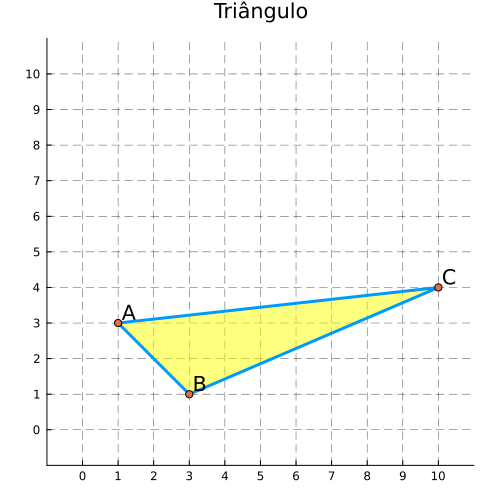

In [64]:
#A função gera as figuras a partir do código anterior.
gerar_tri(x,y)

### 🔺 Desafio 1: Encontrar as coordenadas dos vértices do triângulo

**🎯 Objetivo:**  
Identificar as coordenadas dos vértices $A$, $B$ e $C$ do triângulo fornecido.

---

💡 **Dica:** 
>Lembre-se da ordem das coordenadas: o primeiro valor é a coordenada $x$ **horizontal** e o segundo valor é a coordenada $y$ **vertical**.


### 📝 Informe sua resposta:

- Ponto $A$ = $( \quad )$  
- Ponto $B$ = $( \quad )$   
- Ponto $C$ = $( \quad )$    

### ✅ Confira sua resposta na célula abaixo!


In [49]:
gerar_vert(x,y)

A = (5,5)
B = (8,1)
C = (6,3)


### 🔺 Desafio 2: Existência do Triângulo

**🎯 Objetivo:**  
Observar a figura na malha quadriculada e decidir se os três pontos marcados formam um triângulo.

**💡 Dica:**  
Use o **princípio da desigualdade triangular**:  
> A soma das medidas de dois lados de um triângulo deve ser **sempre maior** que a medida do terceiro lado.
___

### ✏️ Informe sua resposta abaixo.
### 💻 Compile o código abaixo
<hr style="border: none; height: 1px; background-color: black; ">

In [50]:
exist_tri(x,y)

A figuara é um triângulo?:
Digite (s/n) para informar sua conclusão:
stdin> s
✅ Você acertou!


### 🔺 Desafio 3: Classificação do Triângulo

**🎯 Objetivo:**  
Observar a figura representada na malha quadriculada e classificar o triângulo **quanto aos lados**.
> **💡 Dica:**
- 1️⃣ Equilátero: todos os lados iguais;
- 2️⃣ Isósceles: dois lados iguais;
- 3️⃣ Escaleno: todos os lados diferentes.


### 💻 Compile o código abaixo
___

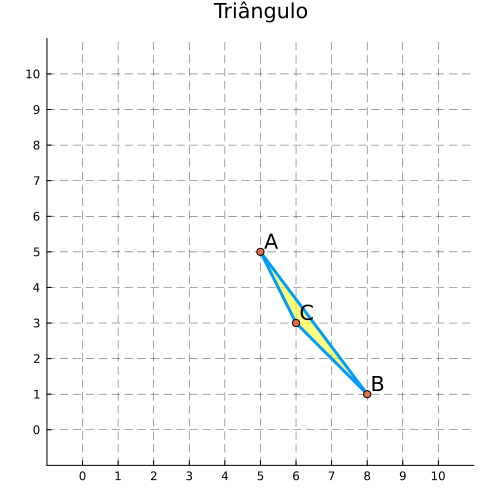

In [51]:
gerar_tri(x,y)

### 💻 Compile o código abaixo
___

In [52]:
class_tri(x,y)

Qual classificação do triângulo?
1️⃣ Equilátero
2️⃣ Isósceles
3️⃣ Escaleno
stdin> 3
✅ Você acertou!


### 🔺 Desafio 4: Encontre as medidas dos lados com aproximação de uma casa decimal

**🎯 Objetivo:**  
Com base no **mesmo triângulo do desafio anterior**, calcule o comprimento dos **três lados** com **aproximação de uma casa decimal**.

---


### ⚙️ Como fazer:

1. Utilize os **três pontos marcados na malha quadriculada**.
2. Calcule as distâncias entre os pares de pontos: $AB$, $AC$ e $BC$;
3. Use o **Teorema de Pitágoras** para facilitar os cálculos de distância entre dois pontos!
>**💡 Dica:** $a^2= b^2+c^2$, onde $a$ é a hipotenusa e $b$ e $c$ são os catetos.
4. Arredonde cada medida para **uma casa decimal**.


### 💻 Compile o código abaixo
___

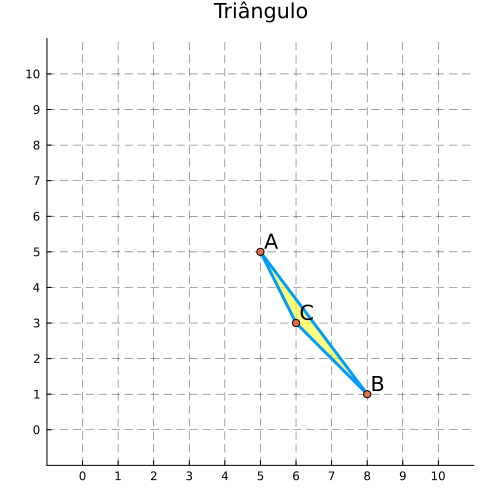

In [53]:
gerar_tri(x,y)

### 📝 Informe sua resposta:

- Lado $AB$ ≈ ____________  
- Lado $AC$ ≈ ____________  
- Lado $BC$ ≈ ____________  

### ✅ Confira sua resposta na célula abaixo!

In [54]:
med_lados(x,y)

AB = 5.0
AC= 2.24
BC = 2.83



### 🔺 Desafio 5: Cálculo do Perímetro com Aproximação de uma Casa Decimal

**🎯 Objetivo:**  
Com base no **mesmo triângulo do desafio anterior**, calcule o **perímetro total** com arredondamento para **uma casa decimal**.
---
### ⚙️ Como fazer:

1. Some as medidas e **econtradas no desafio 3**.
2. Informe o valor do **perímetro aproximado**.

---

**💡 Dica:**  
$$
\text{Perímetro} = AB + AC + BC
$$

---


### 📝 Informe sua resposta:

- Perímetro: ____________unidades  

### ✅ Confira sua resposta na célula abaixo!

In [55]:
perimetro(x,y)

O perímetro do triângulo ABC mede: 10.1 unidades 


### 🔺 Desafio 6: Cálculo da Área com Aproximação de Duas Casas Decimais

**🎯 Objetivo:**  
Com base no **mesmo triângulo do desafio anterior**, calcule a **área total** com arredondamento para **duas casas decimais**.

---

### ⚙️ Como fazer:

Você pode escolher uma das abordagens abaixo:

1. **Área do triângulo retângulo**:  
   Use a fórmula:  
   $$
   A = \dfrac{\text{base} \times \text{altura}}{2}
   $$
---

### ⚙️ Como fazer:

2. **Complete o retângulo** 
> **💡 Dica:**  
    1. ✏️ **Complete o triângulo** com outros triângulos até formar um **retângulo inteiro** ao redor dele.  
    2. 📐 **Calcule a área do retângulo completo.**  
    3. 🔺 **Calcule a área dos triângulos adicionados** (aqueles que estão fora do triângulo original).  
    4. ➖ **Subtraia as áreas adicionadas** da área do retângulo.  
&nbsp;&nbsp;&nbsp;&nbsp;✅ O resultado será **a área do triângulo original**!

---

### ⚙️ Como fazer:

3. **Fórmula de Herão** (para qualquer triângulo):  
   Primeiro calcule o semiperímetro:  
   $$
   p = \dfrac{a + b + c}{2}
   $$  
   Depois aplique na fórmula:  
   $$
   A = \sqrt{p(p - a)(p - b)(p - c)}
   $$  
   Onde $a$, $b$, e $c$ são os comprimentos dos lados do triângulo.

---

### 💻 Compile o código abaixo
___

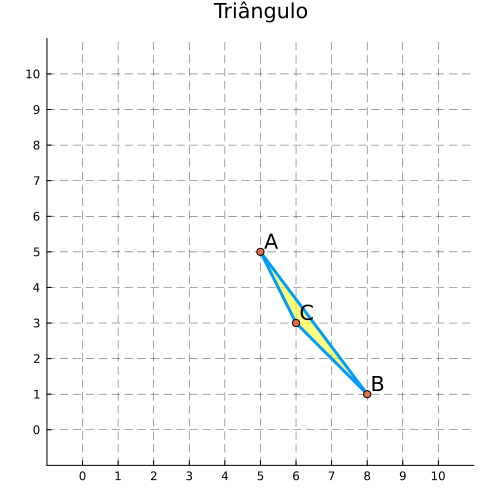

In [56]:
gerar_tri(x,y)

### 📝 Informe sua resposta:

- Área total ≈ ____________ unidades²

### ✅ Confira sua resposta na célula abaixo!

In [57]:
area(x,y)

A área do triangulo ABC mede: 1.0 unidades²


## 👀 Observação

Para concluir esta sequência, é importante destacar que, como os **vértices da figura são sorteados aleatoriamente**, o desafio pode gerar diferentes tipos de triângulos a cada execução.

🔁 **Por isso, é interessante repetir essa atividade várias vezes**, permitindo que os alunos interajam com **diversas construções de triângulos** e desenvolvam sua capacidade de observação, análise e classificação.

Essa variação torna o exercício mais **dinâmico, investigativo e formativo**!
